<a href="https://colab.research.google.com/github/OjoJosh7/Machine-Learning/blob/main/Copy_of_module_2_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


Pridicting passenger satisfaction can benefit airline industry by working on or improving on aspects of their services that will dissatify their customer,since the model enables them to forsee those areas, doing this will inrease their customer satisfaction and patronage.

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [1]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


In [2]:
df_satisfaction = df['satisfaction']
df_satisfaction.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=False)
# To check the data types
print(df.dtypes)

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

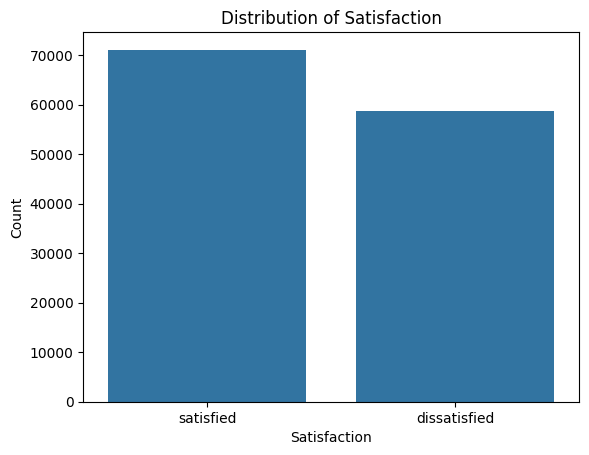

In [10]:
#Visualization of the Targrt variable
from seaborn import countplot
import matplotlib.pyplot as plt
countplot(x=df_satisfaction)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction')
plt.show()


## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [15]:
from re import X
from sklearn.model_selection import train_test_split


df = pd.get_dummies(df)
print(df.head(10))

X = df.drop(['satisfaction_dissatisfied', 'satisfaction_satisfied'], axis=1)
y = df['satisfaction_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.head()
y_train.head(40)

   Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   
5   30             1894             0                                  0   
6   66              227             0                                  0   
7   10             1812             0                                  0   
8   56               73             0                                  0   
9   22             1556             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3             

## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np



depth_val = np.arange(2,11)
learning_rate_val = [0.001, 0.01, 0.1, 1]
n_estimators_val = np.arange(10, 100, 10)
grid_s = [{'max_depth': depth_val,\
'learning_rate':learning_rate_val, 'n_estimators':n_estimators_val }]

#Instantiating the model
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')


#Finding the optimal values of the hyperparameters
result = GridSearchCV(estimator=model, param_grid=grid_s, cv=5, n_jobs=-1, verbose=1 )
result.fit(X_train, y_train)

#Chek the value of the optimal value
best_depth = result.best_params_['max_depth']
best_learning_rate = result.best_params_['learning_rate']
best_n_estimators = result.best_params_['n_estimators']
print('The best parameters are:\
depth={0}, rate={1} and estimator={2}'.\
format(best_depth, best_learning_rate, best_n_estimators ))



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
The best parameters are:depth=10, rate=0.1 and estimator=90


In [7]:
best_xgb_model = result.best_estimator_
y_pred = best_xgb_model.predict(X_test)


## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

Accuracy: 0.9567292885740684
Precision: 0.9729942693409742
Recall: 0.9478715980460573
F1 Score: 0.9602686461647225
Confusion Matrix:
[[11269   377]
 [  747 13583]]


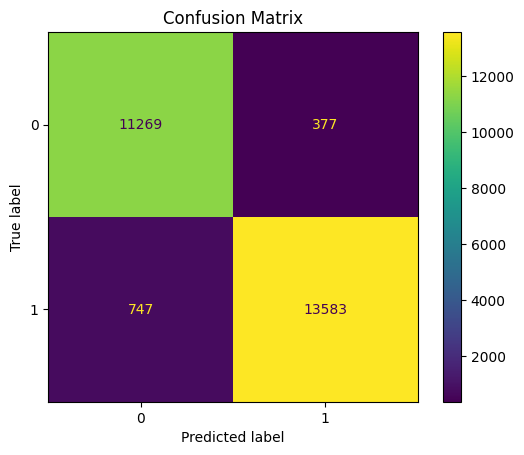

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
matrix_view= ConfusionMatrixDisplay(conf_matrix)
matrix_view.plot()
plt.title('Confusion Matrix')
plt.show()


## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The best parameters are:depth=10 and leaf=1
Accuracy: 0.9282029565753003
Precision: 0.955892034233048
Recall: 0.9119330076762038
F1 Score: 0.9333952358844327
Confusion Matrix:
[[11043   603]
 [ 1262 13068]]


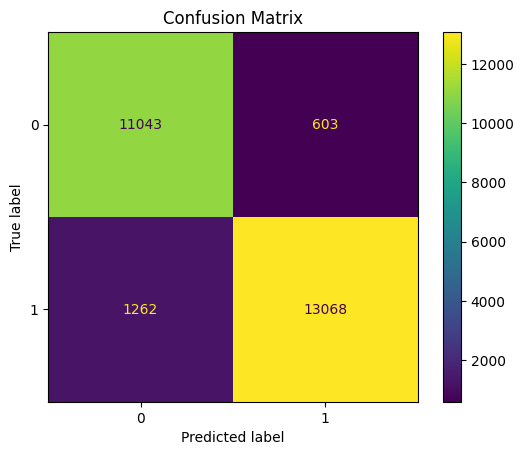

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
depth_val = np.arange(2,11)
leaf_val = np.arange(1,31, step=9)

grid_s = [{'max_depth': depth_val,\
'min_samples_leaf': leaf_val}]
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
result = GridSearchCV(estimator=decision_tree_model, param_grid=grid_s, cv=5, n_jobs=-1, verbose=1 )
result.fit(X_train, y_train)
best_depth = result.best_params_['max_depth']
best_leaf = result.best_params_['min_samples_leaf']
print('The best parameters are:\
depth={0} and leaf={1}'.\
format(best_depth, best_leaf ))
best_decision_tree_model = result.best_estimator_
y_pred = best_decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
matrix_view= ConfusionMatrixDisplay(conf_matrix)
matrix_view.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Train a Decision Tree model

n_estimators_val = np.arange(10, 100, 10)
classifier = RandomForestClassifier(n_estimators = n_estimators_val, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.